# Census Data
Exploring census data

In [29]:
# import required packages
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
import statistics
import matplotlib.pyplot as plt

In [2]:
# import data with pandas
df_race = pd.read_csv("data/2020LA_Census.csv",
    dtype=
    {
        'STATE':str,
        'COUNTY':str,
        'TRACT':str,
        'BLKGRP':str,
    }
                )

In [3]:
df_commute = pd.read_csv("data/2022_cenB08122.csv",
                        dtype =
                        {
                            'FIPS':str
                        }
                        )
df_poverty = pd.read_csv("data/22_cenS1701.csv",
                        dtype =
                        {
                            'FIPS':str
                        }
                        )

In [4]:
df_commute['FIPS'].sample(10)

1792    06037541700
207     06037124102
1833    06037543803
1201    06037401312
2331    06037900808
1323    06037407102
849     06037237102
2258    06037701601
354     06037139506
2496    06037990200
Name: FIPS, dtype: object

In [5]:
# Remove block group leading zero
BLKGRP_trimmed = []
for i in df_race.BLKGRP:
    i = i.replace(i[0], "", 1)
    BLKGRP_trimmed.append(i)

df_race.BLKGRP = BLKGRP_trimmed

In [6]:
# Create FIPS from columns
df_race['FIPS'] = (
    df_race.STATE + 
    df_race.COUNTY +
    df_race.TRACT + 
    df_race.BLKGRP
)

df_race.FIPS.sample(40)

34788    06037403401
66064    06037576601
86487    06037911001
30946    06037320201
8538     06037137203
63991    06037573202
65093    06037575002
38537    06037408301
90560    06037980014
24274    06037272100
64419    06037573800
18815    06037229100
3291     06037113428
53880    06037534403
44301    06037463200
39188    06037408705
34841    06037403403
30429    06037311300
67589    06037600602
31680    06037400501
69015    06037602504
14528    06037205120
82571    06037901209
43958    06037462700
82033    06037901209
67363    06037600202
23794    06037270102
12313    06037191902
21135    06037240020
45398    06037480400
57084    06037542700
81373    06037900902
21454    06037240800
32716    06037401500
23434    06037269000
28617    06037301300
26664    06037294520
10430    06037183103
2684     06037111402
18168    06037224420
Name: FIPS, dtype: object

In [7]:
df_poverty.FIPS.sample(10)

1941    06037570203
2119    06037602602
1537    06037481403
2242    06037700501
398     06037183104
936     06037265203
1808    06037542800
1482    06037462301
1976    06037571900
10      06037102107
Name: FIPS, dtype: object

In [8]:
df_commute.FIPS.sample(10)

606     06037207902
1876    06037552602
1700    06037533300
615     06037208610
373     06037141700
519     06037195804
313     06037134710
1410    06037431600
1333    06037407701
687     06037214100
Name: FIPS, dtype: object

In [9]:
df_race.columns[df_race.isna().all()].tolist()

['SUBMCD',
 'SUBMCDCC',
 'SUBMCDNS',
 'ESTATE',
 'ESTATECC',
 'ESTATENS',
 'UA',
 'UATYPE',
 'UR',
 'CD118',
 'CD119',
 'CD120',
 'CD121',
 'SLDU22',
 'SLDU24',
 'SLDU26',
 'SLDU28',
 'SLDL22',
 'SLDL24',
 'SLDL26',
 'SLDL28',
 'VTD',
 'VTDI',
 'ZCTA',
 'PUMA',
 'GCUNI',
 'PARTFLAG']

In [10]:
df_commute.columns[df_commute.isna().all()].tolist()

[]

In [11]:
df_poverty.columns[df_poverty.isna().all()].tolist()

[]

In [12]:
# axis = 0 drops rows axis = 1 drops columns with null
df_race = df_race.dropna(axis=1,how="all")
df_poverty = df_poverty.dropna(axis=1,how="all")
df_commute = df_commute.dropna(axis=1,how="all")

In [13]:
# Trim Race dataset columns
race_columns = [
    'FIPS',
    'White',
    'Black',
    'AmIndian',
    'Asian',
    'Hawaiian',
    'Other'
]
df_race_trimmed = df_race[race_columns]
df_race_trimmed.head(20)

,FIPS,White,Black,AmIndian,Asian,Hawaiian,Other
0,06037101110,66,2,3,9,0,15
1,06037101110,46,6,0,8,0,17
2,06037101110,49,1,4,7,0,4
3,06037101110,49,0,1,1,0,5
4,06037101110,109,0,1,11,0,15
5,06037101110,95,3,1,7,0,5
6,06037101110,151,0,0,26,0,19
7,06037101110,219,16,0,37,0,87
8,06037101110,246,5,6,22,3,108
9,06037101110,71,0,0,19,0,9


In [48]:
# They come in absolute counts so let's normalize some of the data for now to see
df_commute["belowhunpct"] = (df_commute['B08122_006E'] / df_commute['B08122_005E'])
df_commute['abovehunfiftypct'] = (df_commute['B08122_008E'] / df_commute['B08122_005E'])
df_commute['belowhunpct'].sample()

1609    0.035654
Name: belowhunpct, dtype: float64

In [52]:
commute_columns = [
    'FIPS',
# Drove alone (general format is first column is total, then below 100FPL then 100-149FPL then above 150FPL)
    'B08122_005E',
    'B08122_006E',
    'B08122_007E',
    'B08122_008E',
# Drove carpooled
    'B08122_009E',
    'B08122_010E',
    'B08122_011E',
    'B08122_012E',
# Public transit
    'B08122_013E',
    'B08122_014E',
    'B08122_015E',
    'B08122_016E',
# Percentages
    'belowhunpct',
    'abovehunfiftypct'
]
df_commute_trimmed = df_commute[commute_columns]

In [53]:
df_commute_trimmed['belowhunpct'].sample(10)

1192    0.042336
585     0.151042
1004    0.036846
452     0.086338
907     0.061633
549     0.023718
2223    0.009681
1624    0.004332
1506    0.060571
1997    0.005921
Name: belowhunpct, dtype: float64

In [15]:
poverty_columns = [
    'FIPS',
# Total count
    'S1701_C01_001E',
# Poverty counts by age
    'S1701_C01_002E',
    'S1701_C01_003E',
    'S1701_C01_004E',
    'S1701_C01_005E',
    'S1701_C01_006E',
    'S1701_C01_007E',
    'S1701_C01_008E',
    'S1701_C01_009E',
    'S1701_C01_010E',
# Poverty counts by sex
    'S1701_C01_011E',
    'S1701_C01_012E',
# Poverty counts by race
    'S1701_C01_013E',
    'S1701_C01_014E',
    'S1701_C01_015E',
    'S1701_C01_016E',
    'S1701_C01_017E',
    'S1701_C01_018E',
    'S1701_C01_019E',
    'S1701_C01_020E',
    'S1701_C01_021E',
]
df_poverty_trimmed = df_poverty[poverty_columns]

In [16]:
# Double check counts are correct
white_total = df_race_trimmed['White'].sum()
white_total

3259427

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<Axes: >

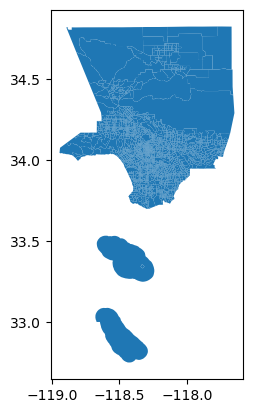

In [17]:
# read in a geojson file downloaded from the LA Times
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.plot()

In [18]:
tracts['FIPS'] = (
    '06037' + tracts.CT20
)
tracts_trimmed = tracts[['FIPS', 'geometry']]
tracts_trimmed.head()

,FIPS,geometry
0,06037101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,06037101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,06037101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,06037101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,06037101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [56]:
commute_tracts = tracts_trimmed.merge(df_commute_trimmed,on="FIPS")

In [57]:
race_tracts = tracts_trimmed.merge(df_poverty_trimmed,on="FIPS")

In [58]:
commute_tracts.columns

Index(['FIPS', 'geometry', 'B08122_005E', 'B08122_006E', 'B08122_007E',
       'B08122_008E', 'B08122_009E', 'B08122_010E', 'B08122_011E',
       'B08122_012E', 'B08122_013E', 'B08122_014E', 'B08122_015E',
       'B08122_016E', 'belowhunpct', 'abovehunfiftypct'],
      dtype='object')

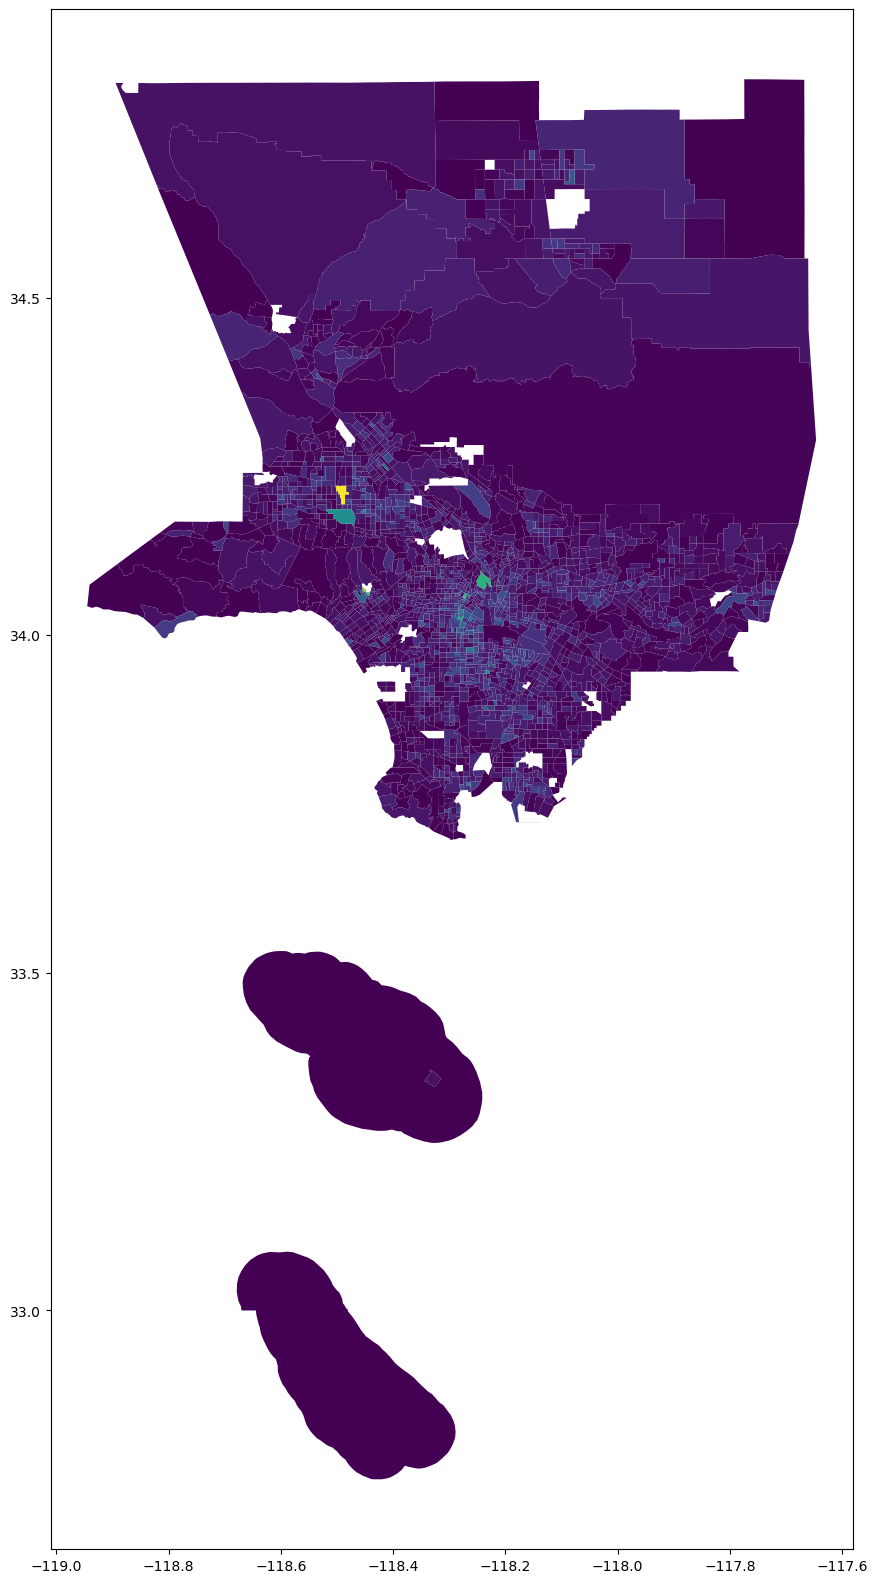

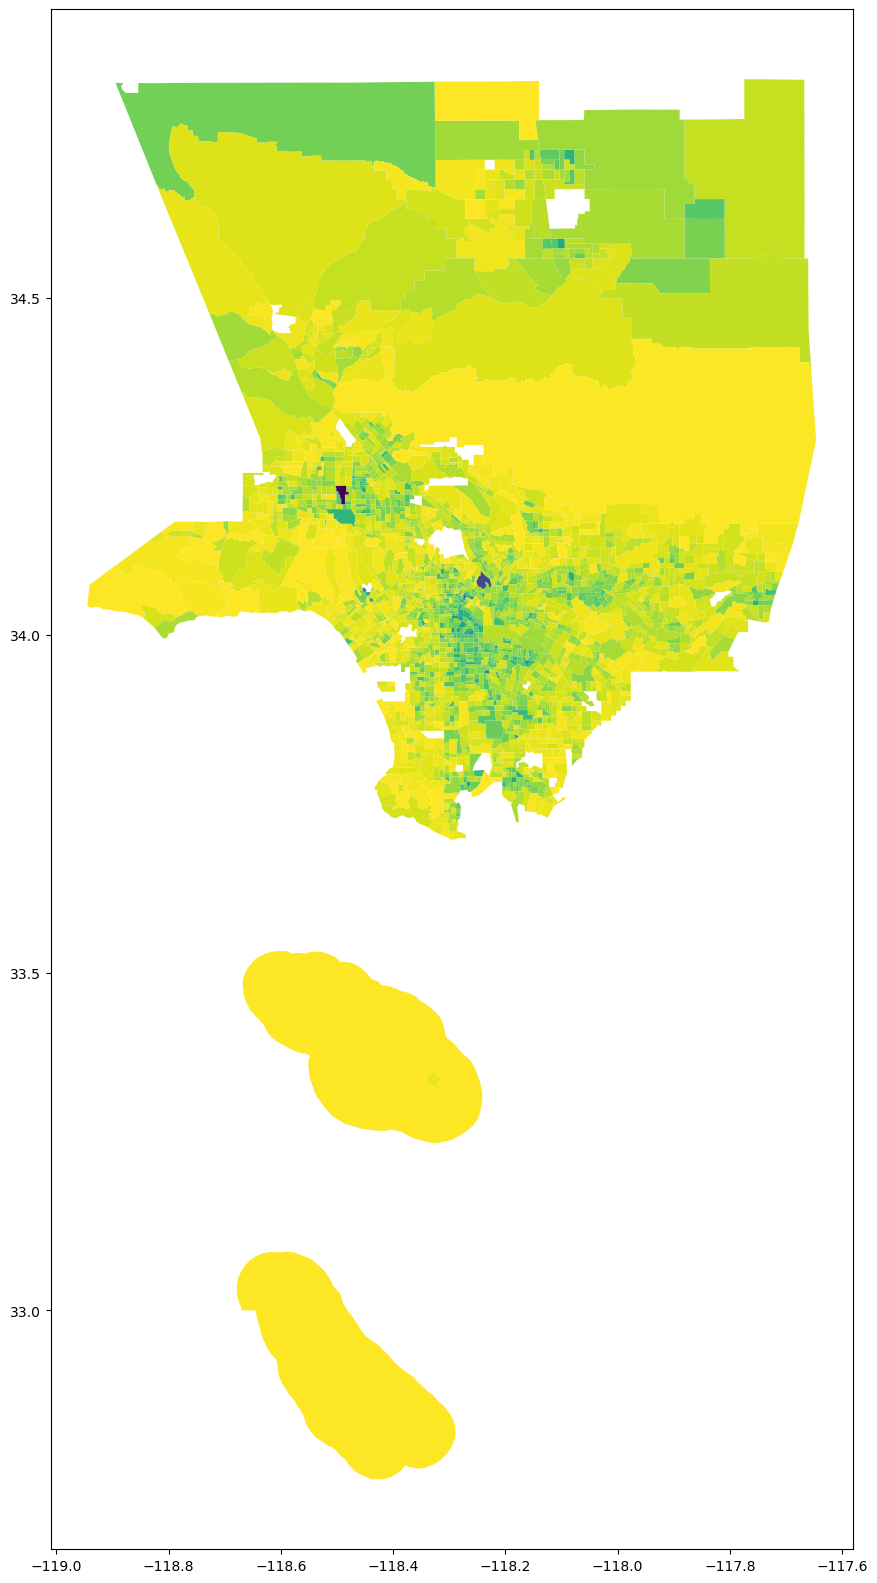

In [59]:
commute_below100 = commute_tracts.plot(
    column='belowhunpct',
    figsize=(20,20)
)
commute_above150 = commute_tracts.plot(
    column='abovehunfiftypct',
    figsize=(20,20)
) 



In [ ]:
commute_tracts.plot(
    figsize=(12,10),
    column='B08122_06E',
    legend=True
)